### IDs:
Insert yours IDs to the cell below

ID #1: 312332323

ID #2: 204780969


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load `Diabetes` dataset from sklearn.
Explore the data. Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of all the features.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).
5. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

In [1]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes(as_frame=True)
data = dataset['data']
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [2]:
dataset['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [3]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

1. The dataset contains 442 samples, 10 features. The data type of each variable is a float, ranges from -2 to 2 since the feature variables have been mean centered and scaled by the standard deviation times the square root of n.

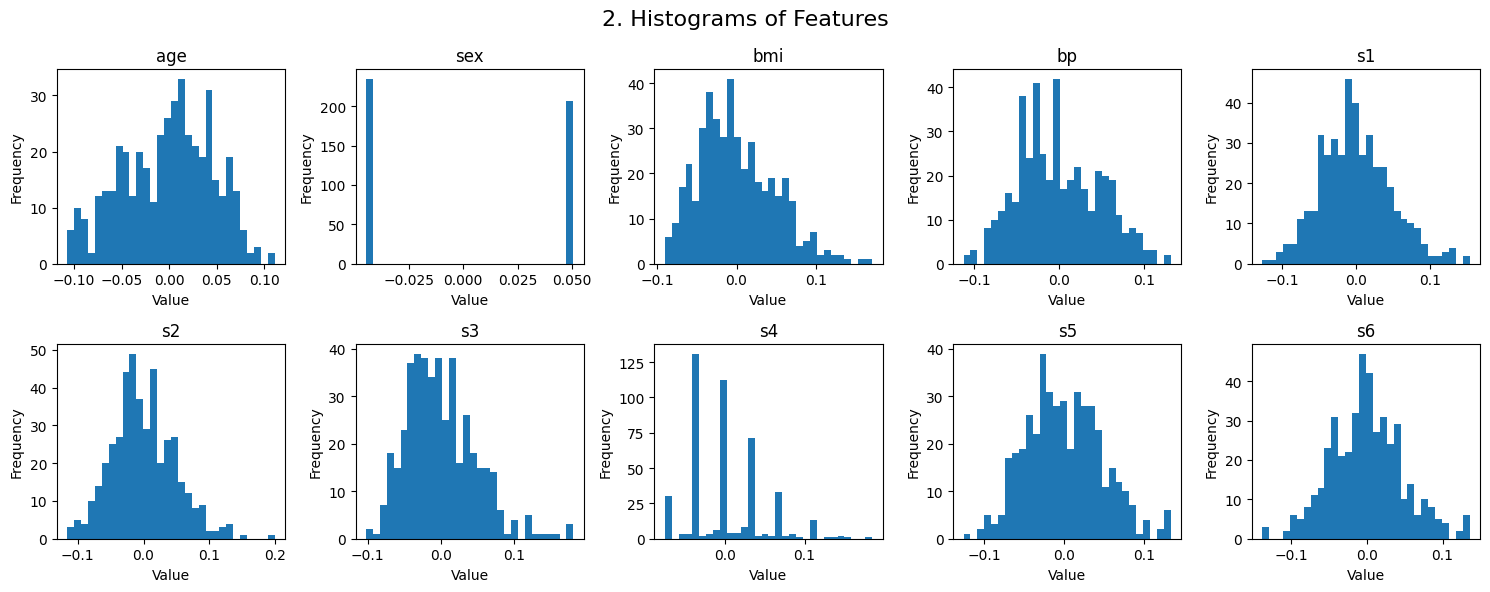

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.suptitle('2. Histograms of Features', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=30)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


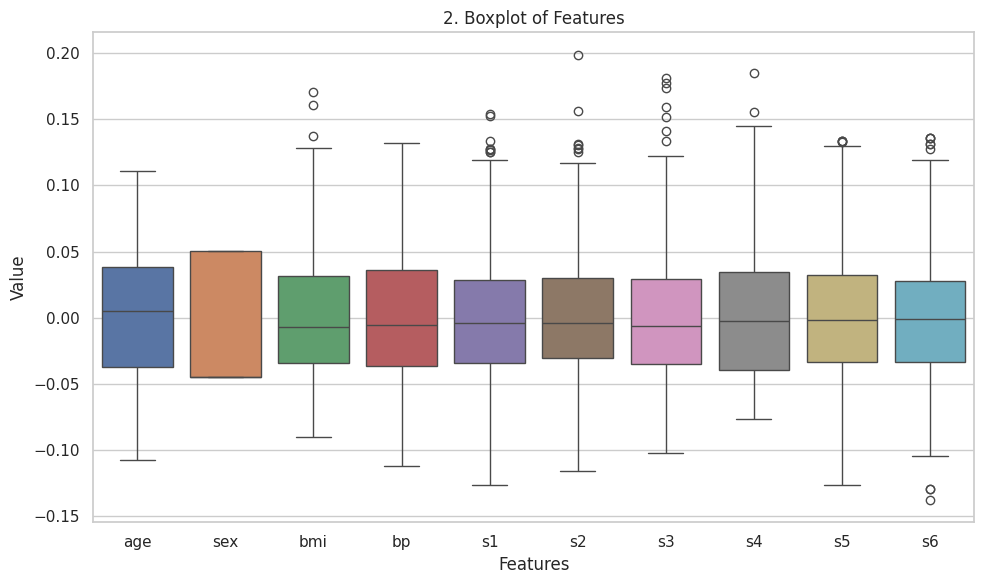

In [5]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('2. Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.tight_layout()

In [6]:
corr = data.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

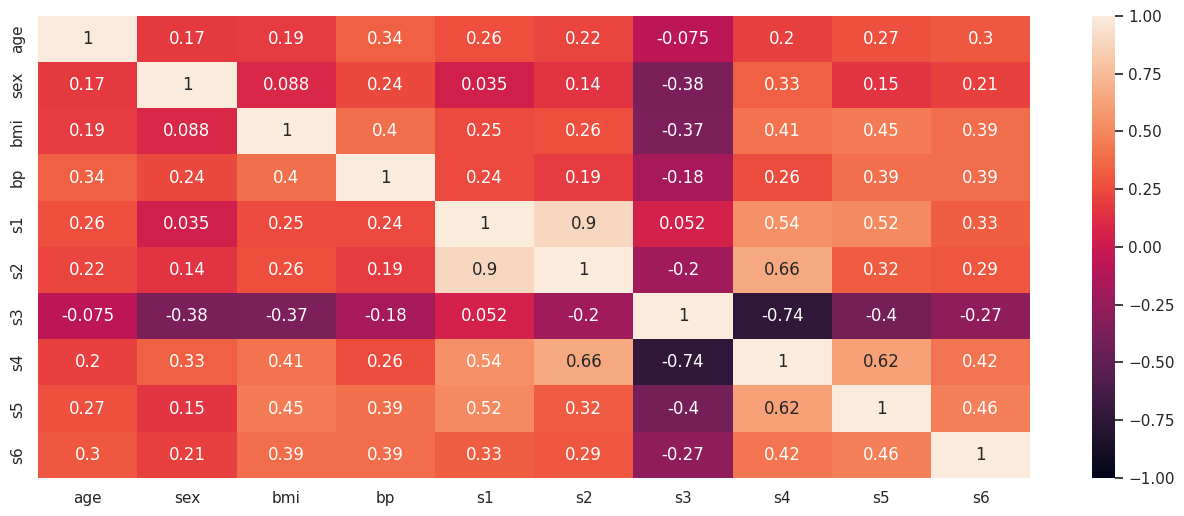

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

3. In the correlation table displayed above, we observe several instances of correlated features. Features s1 and s2 exhibit a notably strong positive correlation, meaning that there is a significant relationship between total serum cholesterol and low-density lipoproteins. In addition, we can see that features s3 and s4 have a high negative correlation, meaning that as the value of high-density lipoproteins increases, the amount of total cholesterol decreases.

 Moreover, the sex feature presents an intriguing pattern: evident from the histogram, it showcases only two distinct values, namely -0.045 and 0.05. The interpretation of these specific values in the context of the sex feature remains unclear.

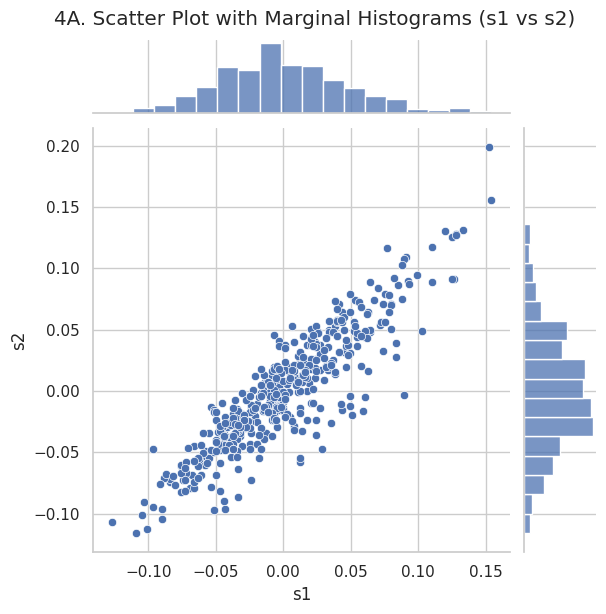

In [8]:
FEATURE_1 = "s1"
FEATURE_2 = "s2"

sns.jointplot(x=FEATURE_1, y=FEATURE_2, data=data, kind='scatter')
plt.suptitle('4A. Scatter Plot with Marginal Histograms (s1 vs s2)', y=1.02)
plt.show()

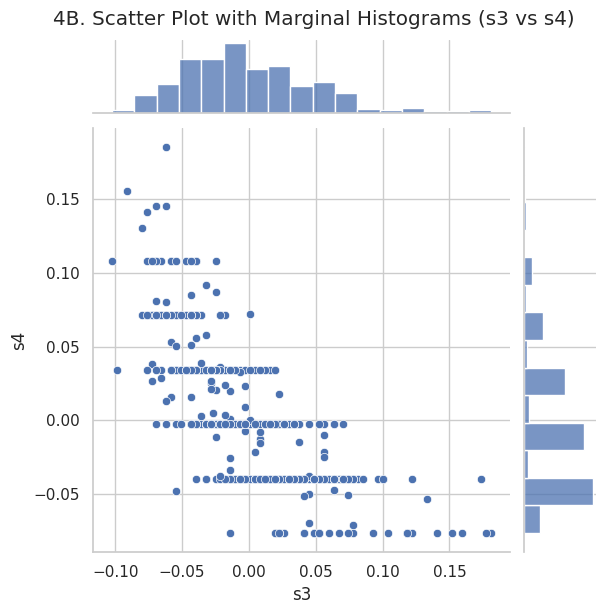

In [9]:
FEATURE_3 = "s3"
FEATURE_4 = "s4"

sns.jointplot(x=FEATURE_3, y=FEATURE_4, data=data, kind='scatter')
plt.suptitle('4B. Scatter Plot with Marginal Histograms (s3 vs s4)', y=1.02)
plt.show()

In [10]:
# Section 5
df = data
df['target'] = dataset['target']
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

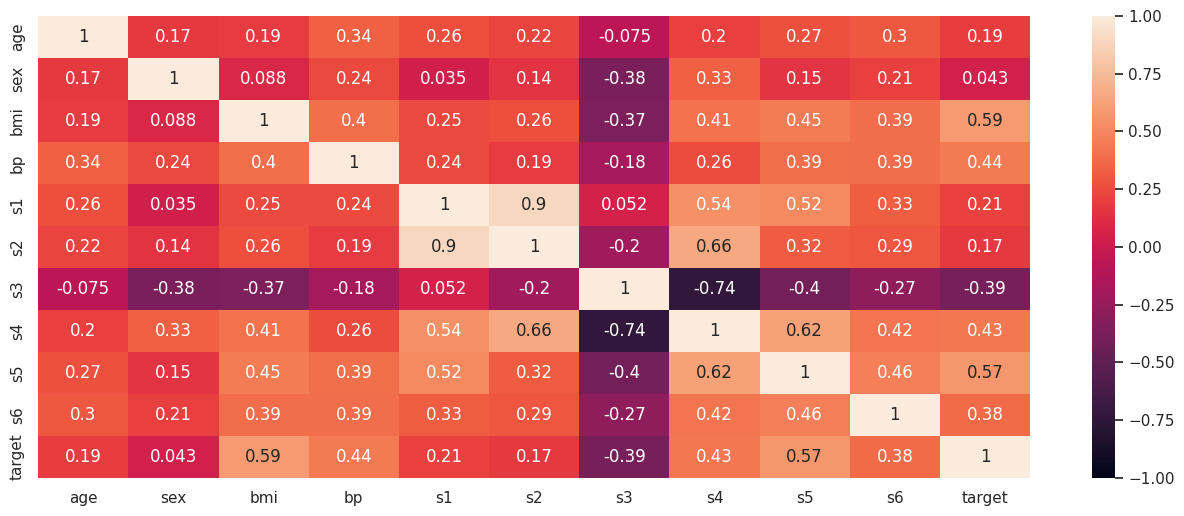

In [28]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

5.

* Correlation between BMI and Diabetes Progression: As we can see in the correlation matrix above, one trend that might be interesting to explore is the correlation between body mass index (BMI) and diabetes progression. It's well-known that obesity and higher BMI can be risk factors for diabetes. By analyzing the relationship between BMI and diabetes progression in this dataset, we could potentially uncover insights into how significant BMI is as a predictor of diabetes progression in these patients.
* Age and Diabetes Progression: Another trend worth investigating is the relationship between age and diabetes progression. Given that the correlation between Age and Diabetes Progression is 0.18, it implies that there is a slight tendency for diabetes progression to increase with age, but the relationship is not very strong. However, it's plausible that older individuals may experience higher rates of diabetes progression due to factors such as longer exposure to the disease, age-related health issues, or changes in lifestyle habits over time.


### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=3$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

in order to define the joint distribution of $\ X, Y \ $ and $Z$ we should have to specify each combination of the random variables possible outcomes, meaning that $nmk$ parameters should be defined. However, we can't define the last parameter since the sum of the probabilities should be 1, so in total $nmk - 1$ parameters should be defined.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

In case that $\ X, Y \ $ and $Z$ are independent, we know that for all triplets $x,y,z$ which are possible outcomes if $\ X, Y \ $ and $Z$ respectively, we have that $P(X=x, Y=y, Z=z) = P(X=x)P(Y=y)P(Z=z)$. Therefore, it's sufficient to define the parameters of each random variables, which is in total $n+m+k$ parameters.
However, each random variable has $t-1$ parameters since the probabilites must sum to 1 (for $t \in {n, m, k}$). The same reason applies to the last parameter in the joint distribution.

Therefore, in total, the number of parameters will be $(n-1) + (m-1) + (k-1) - 1 = n + m + k - 4$ parameters.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

In case that $X$ and $Y$ are conditionaly independent given $Z$, we know that for all pairs $x \in X, y \in Y$ and for all possible values $c \in C$ we have that:

$
P(X=x, Y=y | C = c) = P(X=x | C=c)P(Y=y | C=c).
$


Let's recall the conditional probability property:

$
P(X, Y, Z) = P(X, Y | Z)P(Z)
$

Therefore, in order to define the joint distribution of the three random variables, the following parameters should be defined:
* For the first probability $P(X, Y | Z)$:
 * for each pairs $x \in X, c \in C$ the probability $P(X=x | C=c)$ should be defined, meaning $nk$ parameters. Since the proabilities must sum to 1, for each param in $C$ we have $n-1$ params in $X$, so we actually have to define $k(n-1)$ parameters.
 * for each pairs $y \in X, c \in C$ the probability $P(Y=y | C=c)$ should be defined, meaning $mk$ parameters. Since the proabilities must sum to 1, for each param in $C$ we have $m-1$ params in $Y$, so we actually have to define $k(m-1)$ parameters.

* For the probability $P(Z)$, $k$ parameters should be defined. Since the proabilities must sum to 1, we have to define $k-1$ parameters.

In summary, in total $k(n-1) + k(m-1) + k - 1 = k(n + m - 1) - 1$ parameters should be defined.


#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are normally distributed ($N(2, 2)$) and $W$ is a coin (2 possible values).

if U and V are independent but W not include interaction between U and V, so there is no conditionally independent, cuz within W if U occur V not occur.<br>
so independent not imply conditional independence <br>

$U$ ~ $N(2,2)$: Normally distributed with mean 2 and std 2 <br>
$V$ ~ $N(2,2)$: Normally distributed with mean 2 and std 2 <br>
$W$: A binary random variable representing a coin flip, where $P(w=0)=p$ and $P(w=1)=1-p$ lets say fair coin 0.5<br>
<br>
U  and V are independent: <br>
$P(U  \cap  V) = P(U)P(V)$<br>
<br>
U and V are NOT conditionally independent given W: <br>
$P(U \cap V|W) \neq P(U|W)P(V|W)$<br>
<br>

in our case we define U and V are independent and W is coin flip if $w=0$ we are in U distribution if $w=1$ we are in V.

$P(U \cap V|W) = 0 $<br>
$P(U|W) = P(V|W) = 0.5 $ fair coin

$0 \neq 0.5 \cdot 0.5 = 0.25$


### Question 3 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 105,000 RCU and a standard deviation of 27,500 RCU.

#### 3.A
What percent of people earn less than 50,000 RCU?

In [11]:
from scipy.stats import norm
MEAN = 105000
STD = 27500
print(norm.cdf(50000, MEAN, STD))

0.022750131948179195


#### 3.B
What percent of people earn between 50,000 RCU and 77,500 RCU?

In [12]:
print(norm.cdf(77500, MEAN, STD) - norm.cdf(50000, MEAN, STD))

0.13590512198327787


#### 3.C
What percent of people earn more than 115,000 RCU?

In [13]:
print(1 - norm.cdf(115000, MEAN, STD))

0.35806478442778267


#### 3.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 150,000 RCU?

In [14]:
print(int((1 - norm.cdf(150000, MEAN, STD)) * 1000))

50


### Question 4 - CLT for Markov chains

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T =
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

We first note that $π_0$ is a stationary distribution <br>
This means that for all i - the distribution of $x_i$ is the same as of $x_0$, and in our case uniform.<br>
It also follows that $E(X_i) = E(X_0) = (1+6)/2 = 3.5$<br>

We expect the average value of all 30 numbers in a trajectory to be 3.5.<br> by Linearity of Expectations (the sum of expectation = to the expectation of the sum)
$1/30 \cdot E(\sum_{i=0}^{29}(X_i)) = 1/30 \cdot \sum_{i=0}^{29}E(X_i)$<br>
because $π_0$ is a stationary $E(X_i) = E(X_0)$ <br>
$1/30 \cdot \sum_{i=0}^{29}E(X_i) = 1/30 \cdot \sum_{i=0}^{29}E(X_0) = 1/30 \cdot 30 \cdot E(X_0) = E(X_0) = 3.5$





In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_single_trajectory(trajectory_size: int, T: np.ndarray, pi_0: np.ndarray):
    dice_values = [1,2,3,4,5,6]

    first_roll = np.random.choice(dice_values, size=1, p=pi_0).item()

    trajectory = [first_roll]
    previous_roll = first_roll
    current_roll = None

    for iteration in range(1, trajectory_size):
        previous_roll_index = previous_roll - 1
        current_roll = np.random.choice(dice_values, size=1, p=T[previous_roll_index][:]).item()
        trajectory.append(current_roll)
        previous_roll = current_roll

    return trajectory


def get_trajectory_means(number_of_trajectories: int, trajectory_size: int, T: np.ndarray, pi_0: np.ndarray):
    trajectory_means_list = []
    for iteration in range(number_of_trajectories):
        trajectory = get_single_trajectory(trajectory_size=trajectory_size, T=T, pi_0=pi_0)
        trajectory_means_list.append(np.mean(trajectory))

    return trajectory_means_list

T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              [0.2, 0.4, 0.2, 0.1, 0, 0.1],
              [0.1, 0.2, 0.4, 0.2, 0.1, 0],
              [0, 0.1, 0.2, 0.4, 0.2, 0.1],
              [0.1, 0, 0.1, 0.2, 0.4, 0.2],
              [0.2, 0.1, 0, 0.1, 0.2, 0.4]])
pi_0  = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
number_of_trajectories = 1000
trajectory_size = 30
trajectory_means1 = get_trajectory_means(number_of_trajectories=number_of_trajectories, trajectory_size=trajectory_size, T=T, pi_0=pi_0)

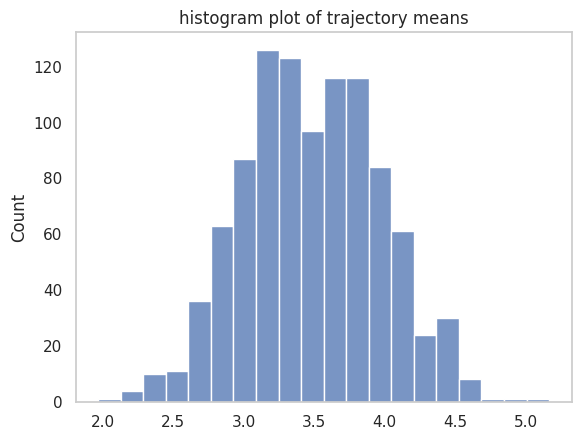

In [16]:
plt.figure()
ax = sns.histplot(trajectory_means1, bins=20)
plt.title('histogram plot of trajectory means')
plt.grid()

In [17]:
print(f'empirical mean {np.mean(trajectory_means1)}')
print(f'empirical std {np.std(trajectory_means1)}')

empirical mean 3.4798666666666667
empirical std 0.4827757519456281


tends toward a normal distribution, even if the original variables themselves are not normally distributed.<br>
empirical mean and empirical std

This is not a surprising result according to the central limit theorem: we are averaging 30 random variables where each variable has the same distribution (uniform 1/6) and since the distribution is stationary, the variables are independent.

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?
4. Draw normal fit curves on your two histograms.

We expect to get an average value that closer to the true mean (3.5) since we are averaging more random variables with the same distribution. According to the law of large numbers, if we increase the number of random variables in the sum, the empirical mean should be closer to the true mean of a single dice.

In [18]:
number_of_trajectories = 1000
trajectory_size = 500
trajectory_means2 = get_trajectory_means(number_of_trajectories=number_of_trajectories, trajectory_size=trajectory_size, T=T, pi_0=pi_0)

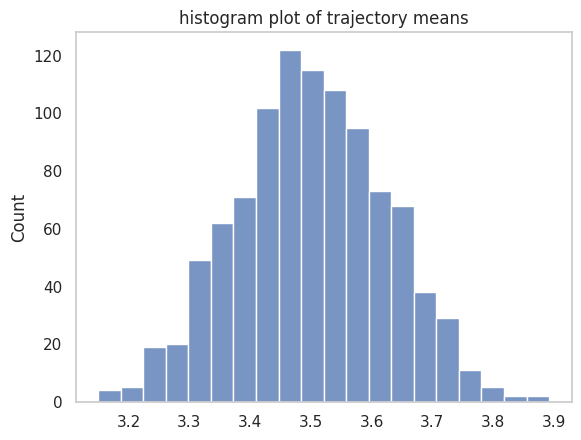

In [19]:
plt.figure()
ax = sns.histplot(trajectory_means2, bins=20)
plt.title('histogram plot of trajectory means')
plt.grid()

In [20]:
print(f'empirical mean {np.mean(trajectory_means2)}')
print(f'empirical std {np.std(trajectory_means2)}')

empirical mean 3.50024
empirical std 0.12336021400759646


Same tends toward a normal distribution, even if the original variables themselves are not normally distributed.<br>
As we expected, the empirical mean is closer to the true mean. <br>
In addition, the empirical std is smaller than the value before. This result can be explained from the law of large numbers: $Var(\bar{X_n}) = \frac{\sigma^2}{n}$, as we increased the trajectory length, we increased the number of dice in the sum and the standard deviation is expected to be smaller.

In [21]:
import scipy
def plot_histogram_with_normal_fit_curve(trajectory_means: list):
    ## create the histogram
    plt.figure()
    ax = sns.histplot(trajectory_means, bins=20, label='Histogram plot', stat='density')
    plt.title('histogram plot of trajectory means with normal fit')
    plt.grid()

    ## create the normal plot
    # create x,y such that x is just a linear space, y is the pdf of the normal distribution
    x_lower_limit = round(min(trajectory_means))
    x_upper_limit = round(max(trajectory_means))
    x = np.linspace(start=x_lower_limit, stop=x_upper_limit, num=1000)

    empirical_mean = np.mean(trajectory_means)
    empirical_std = np.std(trajectory_means)
    normal_rv = scipy.stats.norm(loc=empirical_mean, scale=empirical_std)
    y_pdf = normal_rv.pdf(x)

    ax.plot(x, y_pdf, 'r', lw=2, label='Normal fit plot')

    plt.legend()
    plt.show()


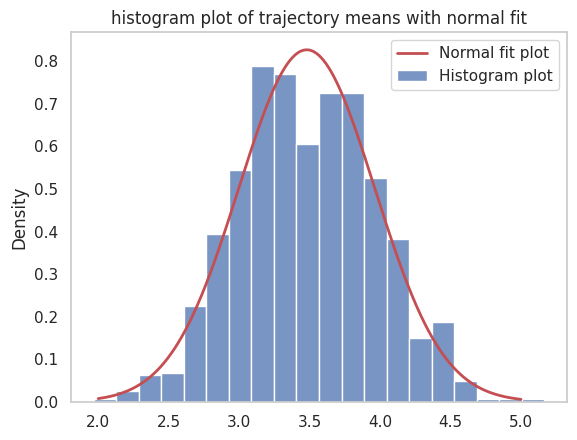

In [22]:
plot_histogram_with_normal_fit_curve(trajectory_means1)

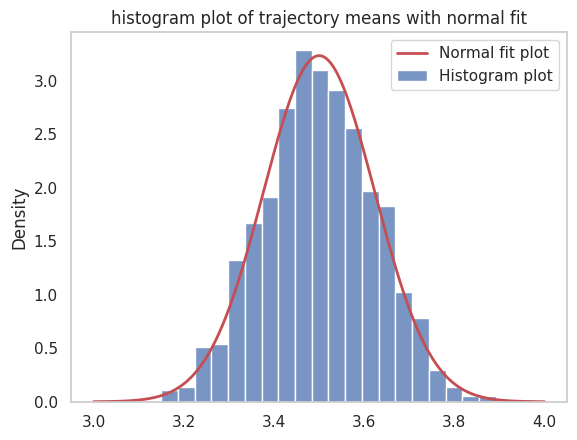

In [23]:
plot_histogram_with_normal_fit_curve(trajectory_means2)

#### 4.C
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$.

Compute the values for our case.

$cov(X_0,X_i) = E(X_0X_i) - E(X_0)E(X_i)$ <br>
in 4A we show $E(X_i) = E(X_0) = 3.5$ <br>

In order to calculate $E(X_0X_i)$ we have k power 2 possible values (36 in our case).
These are all combinations of the different pairs from the possible values (1-6 X 1-6), multiplied by $P(X_0,X_i)$<br>
$E(X_0X_i) = \sum_{u=1}^k \sum_{v=1}^k uvP(X_0=u,X_i=v) = \sum_{u=1}^k \sum_{v=1}^k uvP(X_0=u)P(X_i=v|X_0=u) = \sum_{u=1}^k \sum_{v=1}^k uvP(X_0=u)T^i[u,v]$



In [24]:
amount_of_iterations = 500
cov_list = []
mue_0 = mui_i = 3.5
for i in range(1,amount_of_iterations):

    expection_x_ij = 0
    T_power_k = np.linalg.matrix_power(T, i)
    for u in np.array([1, 2, 3, 4, 5, 6]):
        for v in np.array([1, 2, 3, 4, 5, 6]):
            expection_x_ij += (u)*(v)*pi_0[u-1]*T_power_k[u-1,v-1]

    cov = expection_x_ij - mue_0 * mui_i
    cov_list.append(cov)
print('the convarince is: ')
print(np.array(cov_list))

the convarince is: 
[1.11666667e+00 5.16666667e-01 2.52666667e-01 1.25466667e-01
 6.25866667e-02 3.12666667e-02 1.56282667e-02 7.81314667e-03
 3.90637867e-03 1.95315067e-03 9.76567627e-04 4.88282275e-04
 2.44140830e-04 1.22070353e-04 6.10351645e-05 3.05175798e-05
 1.52587894e-05 7.62939461e-06 3.81469729e-06 1.90734865e-06
 9.53674331e-07 4.76837172e-07 2.38418595e-07 1.19209306e-07
 5.96046590e-08 2.98023384e-08 1.49011790e-08 7.45060014e-09
 3.72530984e-09 1.86266291e-09 9.31340338e-10 4.65682604e-10
 2.32850184e-10 1.16436638e-10 5.82307536e-11 2.91269231e-11
 1.45750079e-11 7.30082661e-12 3.66284780e-12 1.84385840e-12
 9.34363698e-13 4.79616347e-13 2.55795385e-13 1.38555833e-13
 8.52651283e-14 5.50670620e-14 4.61852778e-14 3.90798505e-14
 3.90798505e-14 3.19744231e-14 3.19744231e-14 3.37507799e-14
 3.55271368e-14 3.55271368e-14 3.55271368e-14 3.55271368e-14
 3.55271368e-14 3.90798505e-14 3.90798505e-14 3.55271368e-14
 3.90798505e-14 3.90798505e-14 4.08562073e-14 3.90798505e-14
 3.9

### Question 5 - Distributions

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

1. $P(R=0)$ is the probability that all the samples in $\vec{x}(n)$ are greater than $q$. It can be easily proved since if there was a sample $x_i$ such that $x_i \leq q$, it has an index $j \gt 0$ in the sorted samples array $(a_1, ... , a_n)$ such that $x_i = a_j$, but then $R(\vec{x}(n)) \geq j \gt 0$, and we know that $R(\vec{x}(n)) = 0$.

Therefore, we can calculate the probability that all the samples are greater than $q$:

$P(R=0) = P(x_1, ... , x_n \gt q) = \prod_{i=1}^{n}P(x_i \gt q) = \prod_{i=1}^{n}(1 - P(x_i \leq q)) = \prod_{i=1}^{n}0.2 = 0.2^n$ where we used the fact that the samples are sampled independently from $X$.

2. When $R = k$, by definition, the largest index is $k$ such that $a_k \leq q$. Therefore, there are in total $k$ samples that can be sorted as $[a_1, ... , a_k]$ such that for each $i\in (1,..,k)$ we have that $ a_i \leq q$. It means that there are in total k samples that are less than $q$.
Therefore, the random variable $R$ indicates the number of samples that are less than $q$. Given $n$ samples, we can think of a sample that is less than $q$ as a success, with probability 0.8, and we get that the random variable $R$ has a binomial distribution with $n \geq 100$ and $p=0.8$ (we also use the fact that the samples are sampled independently fron $X$).

3. The probability $p(a_k \leq q)$ for some $a_k$ is the probability that at least k samples $x_{i_{1}}, ... , x_{i_{k}}$ are less than q. Therefore, $p(a_k \leq q) = p(R \geq k) = 1 - p(R < k) = 1 - p(R \leq k - 1) = 1 - \sum_{i=1}^{k-1}p(R=i) = 1 - \sum_{i=1}^{k-1}{n \choose i}p^i (1-p)^{n-i}$.

In addition we have that $p(a_1 \leq q) = p(R \geq 1) = 1 - p(R < 1) = 1 - p(R = 0) = 1 - 0.2^n$

In [25]:
# Section 3

from scipy.stats import binom

def calc_lambda_n(p, n, threshold):
  prev_index = 1
  prev_value = 1 - (0.2 ** n)
  for k in range(2, n + 1):
    p_a_k = 1 - binom.cdf(k-1, n, p)
    if prev_value >= threshold and p_a_k < threshold:
      return prev_index

    prev_index = k
    prev_value = p_a_k

  return None

print(calc_lambda_n(0.8, 100, 0.9))

75


4. We know that $X$ is distributed uniformly, therefore for $q=0.8$ we get that $p(x \leq 0.8) = 0.8$

In [26]:
# Section 4
from scipy.stats import uniform
import numpy as np

N_EXPERIMENTS = 200
N = 100
LANBDA_N = calc_lambda_n(0.8, N, 0.9) - 1 # Substract 1 for python array indexing

lower_bound = 0
upper_bound = 0
for i in range(N_EXPERIMENTS):
  r = uniform.rvs(size=N)
  sorted_r = sorted(r)
  if sorted_r[LANBDA_N] <= 0.8:
    lower_bound += 1
  if sorted_r[LANBDA_N + 1] <= 0.8:
    upper_bound += 1

print(f'lambda_n: {LANBDA_N + 1}')
print(f'Event precentage of a_lambda_n <= q: {lower_bound / N_EXPERIMENTS}')
print(f'Event precentage of a_lambda_n_+_1 <= q: {upper_bound / N_EXPERIMENTS}')


lambda_n: 75
Event precentage of a_lambda_n <= q: 0.925
Event precentage of a_lambda_n_+_1 <= q: 0.885


Indeed we can see in the result of the experiments that $p(a_{75} \leq 0.8) \geq 0.9$ and $p(a_{76} \leq 0.8) < 0.9$